In [1]:
time = 'late'
if (time == 'late'):
    print(1)
    print(1+1)

1
2


In [2]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


In [3]:
#reading the data
data=pd.read_csv('data_cleaned.csv')

In [4]:
#shape of the data
data.shape

(891, 25)

In [5]:
#first five rows of the data
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [6]:
#checking missing values in the data
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [7]:
#seperating independent and dependent variables
y = data['Survived']
X = data.drop(['Survived'], axis=1)

In [8]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split

In [9]:
#creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 10, stratify=y, test_size=0.25)

In [10]:
# distribution in training set
y_train.value_counts(normalize=True)

0    0.616766
1    0.383234
Name: Survived, dtype: float64

In [11]:
# distribution in training set
X_valid.head(10)

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
193,3.000000,26.0000,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
471,38.000000,8.6625,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
682,20.000000,9.2250,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
565,24.000000,24.1500,0,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
103,33.000000,8.6542,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
140,29.699118,15.2458,0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
8,27.000000,11.1333,0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
384,29.699118,7.8958,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
430,28.000000,26.5500,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
407,3.000000,18.7500,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [12]:
# distribution in validation set
y_valid.value_counts(normalize=True)

0    0.61435
1    0.38565
Name: Survived, dtype: float64

In [13]:
#shape of training set
X_train.shape, y_train.shape

((668, 24), (668,))

In [14]:
#shape of validation set
X_valid.shape, y_valid.shape

((223, 24), (223,))

In [15]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [16]:
# how to import decision tree regressor
#from sklearn.tree import DecisionTreeRegressor

In [17]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [18]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [19]:
#checking the training score
dt_model.score(X_train, y_train)

0.9820359281437125

In [20]:
#checking the validation score
dt_model.score(X_valid, y_valid)

0.7757847533632287

In [21]:
#predictions on validation set
dp = pd.DataFrame(dt_model.predict(X_valid))

In [22]:
dp.head(10)

,0
0,1
1,0
2,0
3,1
4,0
5,1
6,0
7,0
8,1
9,1


In [23]:
X_train.shape

(668, 24)

In [24]:
dt_model.predict_proba(X_train)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [25]:
y_pred = dt_model.predict_proba(X_valid)[0:,1]

In [26]:
y_pred

array([1.   , 0.   , 0.   , 1.   , 0.   , 1.   , 0.   , 0.   , 1.   ,
       1.   , 1.   , 0.   , 1.   , 0.   , 1.   , 1.   , 0.   , 0.   ,
       0.   , 0.   , 1.   , 1.   , 0.   , 0.   , 1.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 1.   , 0.   , 1.   , 1.   , 0.   , 1.   ,
       1.   , 1.   , 0.   , 0.8  , 1.   , 1.   , 0.   , 0.   , 0.25 ,
       0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 1.   , 0.   , 0.   ,
       1.   , 0.   , 1.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   ,
       0.   , 1.   , 0.   , 0.   , 0.5  , 0.25 , 0.   , 0.   , 0.   ,
       1.   , 0.   , 0.   , 1.   , 0.   , 0.   , 1.   , 1.   , 1.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
       0.   , 0.   , 0.   , 0.125, 1.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 1.   , 0.   , 1.   ,
       0.   , 1.   , 1.   , 0.   , 1.   , 1.   , 1.   , 1.   , 0.   ,
       0.125, 0.5  ,

In [27]:
y_new = []
for i in range(len(y_pred)):
    if y_pred[i]<=0.5:
        y_new.append(0)
    else:
        y_new.append(1)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_valid, y_new)

0.7757847533632287

## Changing the max_depth

In [30]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [31]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.781437,0.802691
1,2,0.794910,0.762332
2,3,0.820359,0.843049
3,4,0.826347,0.807175
4,5,0.851796,0.847534


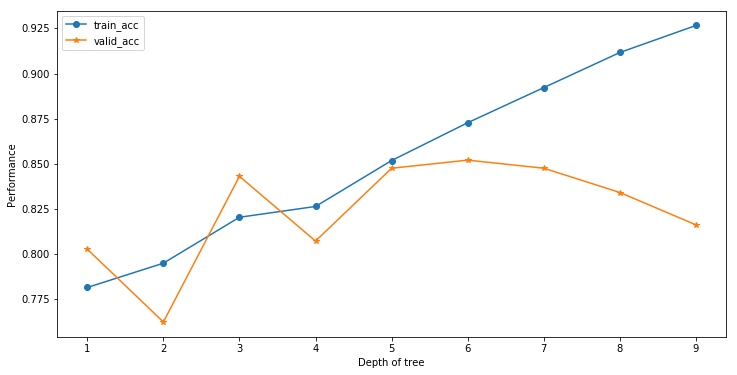

In [32]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='*')
plt.xlabel('Depth of tree')
plt.ylabel('Performance')
plt.legend()

* max_leaf_nodes
* min_samples_split
* min_samples_leaf

In [33]:
dt_model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [34]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=25,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [35]:
#Training score
dt_model.score(X_train, y_train)

0.8832335329341318

In [36]:
#Validation score
dt_model.score(X_valid, y_valid)

0.8699551569506726

In [37]:
from sklearn import tree

In [38]:
!pip install graphviz

In [45]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree2.dot',feature_names=X_train.columns,max_depth=10,filled=True)

In [52]:
from PIL import Image

In [60]:
os.environ["PATH"] += os.pathsep +'C:/ProgramData/Anaconda3/pkgs/statsmodels-0.9.0-py37h452e1ab_0/Lib/site-packages/statsmodels/graphics'

In [61]:
image = plt.imread('tree.dot')
# plt.figure(figsize=(15,15))
# plt.imshow(image)

OSError: cannot identify image file 'tree.dot'

In [57]:
image=plt.imread("tree2.dot")

OSError: cannot identify image file 'tree2.dot'